In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

I0225 105619.175 _utils_internal.py:246] NCCL_DEBUG env var is set to None


I0225 105619.176 _utils_internal.py:264] NCCL_DEBUG is forced to WARN from None


I0225 105621.310 font_manager.py:1349] generated new fontManager


In [2]:
# read it in to inspect it
with open('/home/yucongguo/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

## data pre-processing

In [3]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [23]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [5]:
# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [6]:
# create a mapping from characters to integers
str_to_int = {cha: i for i, cha in enumerate(chars)}
int_to_str = {i:cha  for i, cha in enumerate(chars)}
encode = lambda x: [str_to_int[c] for c in x]
decode = lambda x: ''.join([int_to_str[c] for c in x])

print(str_to_int)
print("\n\n")


print(encode("hii there"))
print(decode(encode("hii there")))

{'\n': 0, ' ': 1, '!': 2, '$': 3, '&': 4, "'": 5, ',': 6, '-': 7, '.': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'K': 23, 'L': 24, 'M': 25, 'N': 26, 'O': 27, 'P': 28, 'Q': 29, 'R': 30, 'S': 31, 'T': 32, 'U': 33, 'V': 34, 'W': 35, 'X': 36, 'Y': 37, 'Z': 38, 'a': 39, 'b': 40, 'c': 41, 'd': 42, 'e': 43, 'f': 44, 'g': 45, 'h': 46, 'i': 47, 'j': 48, 'k': 49, 'l': 50, 'm': 51, 'n': 52, 'o': 53, 'p': 54, 'q': 55, 'r': 56, 's': 57, 't': 58, 'u': 59, 'v': 60, 'w': 61, 'x': 62, 'y': 63, 'z': 64}



[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [7]:
text[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

In [8]:
#encode the entire text dataset and store it into a torch.Tensor
data = torch.tensor(encode(text), dtype=torch.long)
print(f"data.shape : {data.shape},data type : {data.dtype}")
print(data[:100]) # the 100 characters we looked at earier will to the GPT look like this

data.shape : torch.Size([1115394]),data type : torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59])


In [9]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [10]:
# tranining data transform demo
block_size = 8
x = train_data[:block_size]
y = train_data[1:block_size+1]
print(f"training data: {x} \n\n")
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

training data: tensor([18, 47, 56, 57, 58,  1, 15, 47]) 


when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [11]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    data = train_data if split == 'train' else val_data
    index = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in index])
    y = torch.stack([data[i+1:i+1+block_size] for i in index])
    return x, y

# let's see example of training data

x, y = get_batch('train')
print(f"x.shape: {x.shape}")
print("x:")
print(x)
print(f"\ny.shape: {y.shape}")
print('y:')
print(y)

x.shape: torch.Size([4, 8])
x:
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])

y.shape: torch.Size([4, 8])
y:
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])


## Bigram model

In [12]:
import torch
import torch.nn as nn
from torch.nn  import functional as F
torch.manual_seed(1337)

batch_size = 4
block_size = 8
# vocab_size = 65

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()

        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size) 
        #(65,65) there are 65 characters in our vocabulary, each character has 65 embedding dimensions
    
    def forward(self, index,targets = None):
        '''
        index: x
        targets: y
        '''

        logits = self.token_embedding_table(index) #(4,8,65) (batch_size, block_size, embedding dimension)

        if targets is None:
            loss = None
        else:
            batch_size, block_size, emb_dim = logits.shape
            logits = logits.view(batch_size * block_size, emb_dim)
            targets = targets.view(batch_size * block_size)
            loss = F.cross_entropy(logits, targets)
        return logits, loss
    
    def generate(self, index, max_new_tokens):

        for _ in range(max_new_tokens):
            #since in generating, we only pass in 1 batch

            # get the predictions
            logits, loss = self.forward(index) #(1, index, 65)
            # focus only on the last time step
            logits = logits[:,-1,:] #(1,65)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1)
            # append sampled index to the running sequence
            idx_next = torch.multinomial(probs, num_samples=1) 
            # append sampled index to the running sequence
            index = torch.cat((index, idx_next), dim=1) # (B, T+1)
        return index

m = BigramLanguageModel(vocab_size)
logits, loss = m.forward(x,y)
print(f"logit.shape: {logits.shape}")
print(f"loss:{loss}\n\n")

output = m.generate(index = torch.zeros((1,1), dtype=torch.long), max_new_tokens=100)
decode_output = decode(output[0].tolist())
print(f"generated output: {decode_output}")

logit.shape: torch.Size([32, 65])
loss:4.878634929656982


generated output: 
SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [13]:
# train bigram

optimizer = torch.optim.AdamW(m.parameters(), lr=0.001)
batch_size = 32

for steps in range(1000):
    x,y = get_batch('train')

    logits, loss = m.forward(x,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if steps % 100 == 0:
        print(f"{steps}: {loss.item()}")

0: 4.692410945892334
100: 4.621085166931152


200: 4.549462795257568
300: 4.345612049102783


400: 4.255731582641602
500: 4.214480876922607


600: 4.124096870422363
700: 3.9863951206207275


800: 3.9517807960510254
900: 3.837888717651367


In [14]:
output = m.generate(index = torch.zeros((1,1), dtype=torch.long), max_new_tokens=100)
decode_output = decode(output[0].tolist())
print(f"generated output: {decode_output}")

generated output: 
Wh;;Sq.f ustNzknc
kwgOj$dhPWr,SV?hsusiKpgXXUh;Apmem d?hESXI.i;TrJgkiF-oKbXCAA -botrngFCHAUQkn$

pn$w


## Improvement: average past context

In [66]:
# take the average previous seen token as current token

# toy example

torch.manual_seed(1337)
batch_size, block_size, emb_dim = 4,8,2
x = torch.randn(batch_size, block_size, emb_dim)
print(f"x.shape: {x.shape}")  #(B, block_size, embedding_dim)
print("x[0]:")
print(x[0])

x_bow = torch.zeros(batch_size, block_size, emb_dim) # x bag of words
for b in range(batch_size):
    for t in range(block_size):
        x_prev = x[b,:t+1] #previous token including current token
        x_bow[b,t] = torch.mean(x_prev, dim=0)
print(f"\n\nx_bow.shape: {x_bow.shape}")  #(B, block_size, embedding_dim)
print("x_bow[0]:")
print(x_bow[0])

x.shape: torch.Size([4, 8, 2])
x[0]:
tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])


x_bow.shape: torch.Size([4, 8, 2])
x_bow[0]:
tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])


In [16]:
# mathematical trick of doing above
# use matrix multiple for a weighted aggregation

weighted = torch.tril(torch.ones(block_size,block_size)) # lower triangular matrix
weighted = weighted / weighted.sum(1, keepdim=True)
x_bow2 = weighted @ x # (B, block_size, block_size) @ (B, block_size, embedding_dim) ----> (B, block_size, embedding_dim)

print("weighted:")
print(weighted)

print("x_bow2[0]:")
print(x_bow2[0])

print("\nx_bow and x_bow2 are equal")

weighted:
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])
x_bow2[0]:
tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

x_bow and x_bow2 are equal


In [17]:
# use softmax of doing above

tril = torch.tril(torch.ones(block_size, block_size)) # all zero lower triangular matrix
print(f"tril:\n{tril}")

weighted = torch.zeros((block_size,block_size))
print(f"weighted:\n{weighted}")

weighted = weighted.masked_fill(tril == 0, float('-inf'))
print(f"weighted:\n{weighted}")

weighted = F.softmax(weighted, dim=-1)
print(f"weighted:\n{weighted}")

x_bow3 = weighted @ x # (B, block_size, block_size) @ (B, block_size, embedding_dim) ----> (B, block_size, embedding_dim)

print("\nx_bow and x_bow2 and x_bow3 are equal")

tril:
tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])
weighted:
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
weighted:
tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -

## Improvement: Single head self attention

self attention: \
every token will emit two vectors, key vector and query vector \
query vector: what am i looking for \
key vector: what do i contain 


In [22]:
# example of single Head perform self-attention

head_size = 16
emb_dim = 2
batch_size, block_size, emb_dim = 4,8,2
x = torch.randn(batch_size, block_size, emb_dim)

key = nn.Linear(emb_dim, head_size, bias=False)
query = nn.Linear(emb_dim, head_size, bias=False)
k = key(x) # (B, block_size, head_size)
q = query(x) # (B, block_size, head_size)
weighted = q @ k.transpose(-1,-2) # (B, block_size, head_size) @ (B, head_size, block_size) ----> (B, block_size, block_size)

tril = torch.tril(torch.ones(block_size, block_size)) # all zero lower triangular matrix
weighted = weighted.masked_fill(tril == 0, float('-inf'))
weighted = F.softmax(weighted, dim=-1)

out = weighted @ x # (B, block_size, block_size) @ (B, block_size, embedding_dim) ---> (B, block_size, embedding_dim)

- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with `tril`, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "Scaled" attention additional divides `wei` by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

In [68]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 1000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 6

torch.manual_seed(1337)

# read it in to inspect it
with open('/home/yucongguo/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
str_to_int = {cha: i for i, cha in enumerate(chars)}
int_to_str = {i:cha  for i, cha in enumerate(chars)}
encode = lambda x: [str_to_int[c] for c in x]
decode = lambda x: ''.join([int_to_str[c] for c in x])

# Let's now split up the data into train and validation sets
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    data = train_data if split == 'train' else val_data
    index = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in index])
    y = torch.stack([data[i+1:i+1+block_size] for i in index])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out


class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

    def forward(self,x):
        B, T, C = x.shape
        k = self.key(x) # (B, block_size, head_size)
        q = self.query(x) # (B, block_size, head_size)
        # compute the attention scores between queries and keys
        weighted = q @ k.transpose(-1,-2) # (B, block_size, head_size) @ (B, head_size, block_size) ----> (B, block_size, block_size)
        weighted = weighted.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # decode, data doesnt communicate with past
        weighted = F.softmax(weighted, dim=-1)

        v = self.value(x) # (B, block_size, head_size)
        out = weighted @ v # (B, block_size, block_size) @ (B, block_size, head_size) ---> (B, block_size, head_size)
        return out



class BigramLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd) # embed on tokens
        self.position_embedding_table = nn.Embedding(block_size, n_embd) # embed on positions
        self.sa_head = Head(n_embd) # self attention head
        self.lm_head = nn.Linear(n_embd, vocab_size) # language model head, used to make prediction from embedding to tokens 
        
    def forward(self, idx, targets = None):

        '''
        index: x
        targets: y
        '''

        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx) # (B, block_size, n_embd)
        pos_emb = self.position_embedding_table(torch.arange(T, device=target.device))
        x = tok_emb + pos_emb #(B, block_size, n_embd) + (block_size, n_embd) ----->  (B, block_size, n_embd)
        x = self.sa_head.forward(x) # apply one head of self attention (B, block_size, n_embd)
        logits = self.lm_head(x) # project to output space (B, block_size, vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

            
    def generate(self, index, max_new_tokens):

        for _ in range(max_new_tokens):
            #since in generating, we only pass in 1 batch

            idx_cond = index[:, -block_size:]
            # get the predictions
            logits, loss = self.forward(idx_cond) #(1, index, 65)
            # focus only on the last time step
            logits = logits[:,-1,:] #(batch_size, vocab_size) = (1,65)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1)
            # append sampled index to the running sequence
            idx_next = torch.multinomial(probs, num_samples=1) 
            # append sampled index to the running sequence
            index = torch.cat((index, idx_next), dim=1) # (B, T+1)
        return index

model = BigramLanguageModel()
m = model.to(device)

# train bigram

optimizer = torch.optim.AdamW(m.parameters(), lr=learning_rate)
batch_size = 32

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print("\ngenerated message with singal head self attention:")
print(decode(m.generate(context, max_new_tokens=300)[0].tolist()))

step 0: train loss 4.2663, val loss 4.2644


step 500: train loss 2.6385, val loss 2.6467


step 999: train loss 2.5969, val loss 2.6091



generated message with singal head self attention:



 e  !tsomeakea so.
c
ESst:
RNYINE: oud ted be.
 oe t e
Ka gheribure kiean s I e owoun: tenot s t nd u bad wasouw cis f,;thhin th fe, he weeretis ing INou d wikst bl:
HUNulunengis w-owomstunktho ndepe?
ThowAshamirithored
TARf esolles.
C ss-
LI lld, pn anor widoun atofeap ant m the opr win k,
Woeercet


## MULTI head attention

- multiple heads of self-attention in parallel

In [69]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 1000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 4

torch.manual_seed(1337)

# read it in to inspect it
with open('/home/yucongguo/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
str_to_int = {cha: i for i, cha in enumerate(chars)}
int_to_str = {i:cha  for i, cha in enumerate(chars)}
encode = lambda x: [str_to_int[c] for c in x]
decode = lambda x: ''.join([int_to_str[c] for c in x])

# Let's now split up the data into train and validation sets
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    data = train_data if split == 'train' else val_data
    index = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in index])
    y = torch.stack([data[i+1:i+1+block_size] for i in index])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out


class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

    def forward(self,x):
        B, T, C = x.shape
        k = self.key(x) # (B, block_size, head_size)
        q = self.query(x) # (B, block_size, head_size)
        # compute the attention scores between queries and keys
        weighted = q @ k.transpose(-1,-2) # (B, block_size, head_size) @ (B, head_size, block_size) ----> (B, block_size, block_size)
        weighted = weighted.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # decode, data doesnt communicate with past
        weighted = F.softmax(weighted, dim=-1)

        v = self.value(x) # (B, block_size, head_size)
        out = weighted @ v # (B, block_size, block_size) @ (B, block_size, head_size) ---> (B, block_size, head_size)
        return out

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)

        return out

class BigramLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd) # embed on tokens
        self.position_embedding_table = nn.Embedding(block_size, n_embd) # embed on positions
        self.sa_head = MultiHeadAttention(n_head, n_embd // n_head ) # self attention head 
        self.lm_head = nn.Linear(n_embd, vocab_size) # language model head, used to make prediction from embedding to tokens 
        
    def forward(self, idx, targets = None):

        '''
        index: x
        targets: y
        '''

        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx) # (B, block_size, n_embd)
        pos_emb = self.position_embedding_table(torch.arange(T, device=target.device))
        x = tok_emb + pos_emb #(B, block_size, n_embd) + (block_size, n_embd) ----->  (B, block_size, n_embd)
        x = self.sa_head.forward(x) # apply one head of self attention (B, block_size, n_embd)
        logits = self.lm_head(x) # project to output space (B, block_size, vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

            
    def generate(self, index, max_new_tokens):

        for _ in range(max_new_tokens):
            #since in generating, we only pass in 1 batch

            idx_cond = index[:, -block_size:]
            # get the predictions
            logits, loss = self.forward(idx_cond) #(1, index, 65)
            # focus only on the last time step
            logits = logits[:,-1,:] #(batch_size, vocab_size) = (1,65)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1)
            # append sampled index to the running sequence
            idx_next = torch.multinomial(probs, num_samples=1) 
            # append sampled index to the running sequence
            index = torch.cat((index, idx_next), dim=1) # (B, T+1)
        return index

model = BigramLanguageModel()
m = model.to(device)

# train bigram

optimizer = torch.optim.AdamW(m.parameters(), lr=learning_rate)
batch_size = 32

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print("\ngenerated message with multihead self-attention:")
print(decode(m.generate(context, max_new_tokens=300)[0].tolist()))

step 0: train loss 4.2252, val loss 4.2224


step 500: train loss 2.5123, val loss 2.5305


step 999: train loss 2.4758, val loss 2.5038

generated message with multihead self-attention:



 r cutsomy k GRes.
S
GUCE:
RIONRE:
GSThted be.
Tome pe

corheribere Yeeay s I e owoun: tenot s t nd u bayo bsouwicoflllath in th ff, h coueretis ilan ure d wikst hichep; huleng sh powimerupare marepe?
Thown hant berrt den th es lleshy, dshe.

My topr anoru id wn me aryofand meth topr win k, soeercet


## MULTI head attention 
- with block implementation (feed forward)
- layernorm
- dropout

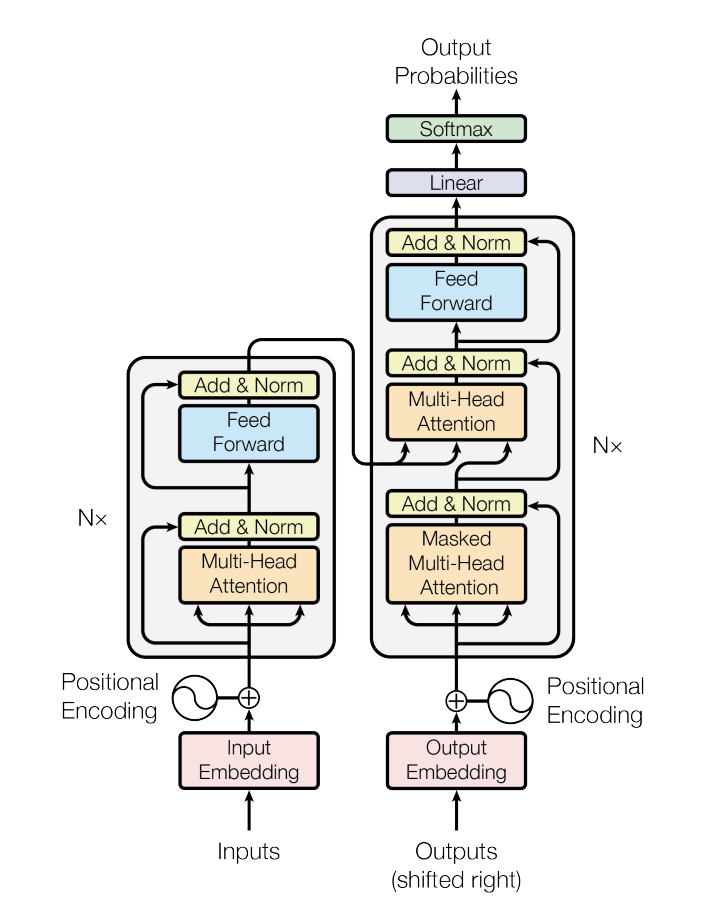

In [71]:
from IPython import display
display.Image("/home/yucongguo/Screenshot 2024-02-25 at 3.15.37 PM.png")

In [70]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 1000
eval_interval = 500
learning_rate = 3e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 384
n_head = 4
dropout = 0.0

torch.manual_seed(1337)

# read it in to inspect it
with open('/home/yucongguo/input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
str_to_int = {cha: i for i, cha in enumerate(chars)}
int_to_str = {i:cha  for i, cha in enumerate(chars)}
encode = lambda x: [str_to_int[c] for c in x]
decode = lambda x: ''.join([int_to_str[c] for c in x])

# Let's now split up the data into train and validation sets
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    data = train_data if split == 'train' else val_data
    index = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in index])
    y = torch.stack([data[i+1:i+1+block_size] for i in index])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)


class Head(nn.Module):

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer("tril", torch.tril(torch.ones(block_size, block_size)))

    def forward(self,x):
        B, T, C = x.shape
        k = self.key(x) # (B, block_size, head_size)
        q = self.query(x) # (B, block_size, head_size)
        # compute the attention scores between queries and keys
        weighted = q @ k.transpose(-1,-2) # (B, block_size, head_size) @ (B, head_size, block_size) ----> (B, block_size, block_size)
        weighted = weighted.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # decode, data doesnt communicate with past
        weighted = F.softmax(weighted, dim=-1)

        v = self.value(x) # (B, block_size, head_size)
        out = weighted @ v # (B, block_size, block_size) @ (B, block_size, head_size) ---> (B, block_size, head_size)
        return out

class MultiHeadAttention(nn.Module):

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.proj(out)
        return out

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

class BigramLanguageModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd) # embed on tokens
        self.position_embedding_table = nn.Embedding(block_size, n_embd) # embed on positions
        self.lm_head = nn.Linear(n_embd, vocab_size) # language model head, used to make prediction from embedding to tokens 
        self.blocks = nn.Sequential(
            Block(n_embd, n_head= 4),
            Block(n_embd, n_head= 4),
            Block(n_embd, n_head= 4),
        )
    def forward(self, idx, targets = None):

        '''
        index: x
        targets: y
        '''

        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx) # (B, block_size, n_embd)
        pos_emb = self.position_embedding_table(torch.arange(T, device=target.device))
        x = tok_emb + pos_emb #(B, block_size, n_embd) + (block_size, n_embd) ----->  (B, block_size, n_embd)
        x = self.blocks(x) # (B, block_size, n_embd)
        logits = self.lm_head(x) # project to output space (B, block_size, vocab_size)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            loss = F.cross_entropy(logits, targets)
        return logits, loss

            
    def generate(self, index, max_new_tokens):

        for _ in range(max_new_tokens):
            #since in generating, we only pass in 1 batch

            idx_cond = index[:, -block_size:]
            # get the predictions
            logits, loss = self.forward(idx_cond) #(1, index, 65)
            # focus only on the last time step
            logits = logits[:,-1,:] #(batch_size, vocab_size) = (1,65)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1)
            # append sampled index to the running sequence
            idx_next = torch.multinomial(probs, num_samples=1) 
            # append sampled index to the running sequence
            index = torch.cat((index, idx_next), dim=1) # (B, T+1)
        return index

model = BigramLanguageModel()
m = model.to(device)

# train bigram

optimizer = torch.optim.AdamW(m.parameters(), lr=learning_rate)
batch_size = 32

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print("\ngenerated message with multihead self-attention:")
print(decode(m.generate(context, max_new_tokens=300)[0].tolist()))

step 0: train loss 4.5615, val loss 4.5619


step 500: train loss 1.9307, val loss 2.0217


step 999: train loss 1.6375, val loss 1.8099



generated message with multihead self-attention:



I pacionate to turs thought.

ANTIO:
Be Johnession: the ever whe's cornall at I post which:
'twomb.

Griettle beach
Thou morish'd tit God-repossear youd, and and are of
God your holity good come not
sictio coursly she seaf have,
And or thy comes pase be whom streed you from how pecience;
Werefore to
